## Predicting if a patient has heart disease or not
### let's start with the EDA(Exploratory Data Analysis)

What questions are we trying to solve?
What kind of data do we have and how do we treat different types?
What's missing from the data and how do we deal with it?
Where are the outliers and why should we care about them?
How can w add, change or remove features to get more out of our data?

In [1]:
## importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
heart_disease= pd.read_csv('heart_disease.csv')
heart_disease.shape

(303, 14)

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

we've got 165 patients with heart disease amd 138 without

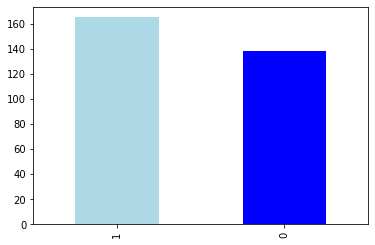

In [5]:
heart_disease['target'].value_counts().plot(kind='bar',color=['lightblue','blue']);

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
### 1 is male and 0 is female
heart_disease['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(heart_disease['target'],heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


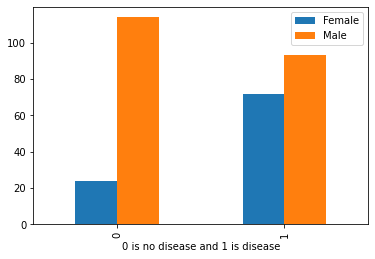

In [11]:
pd.crosstab(heart_disease['target'],heart_disease['sex']).plot(kind='bar')
plt.xlabel('0 is no disease and 1 is disease')
plt.legend(['Female','Male']);

In [12]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [13]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


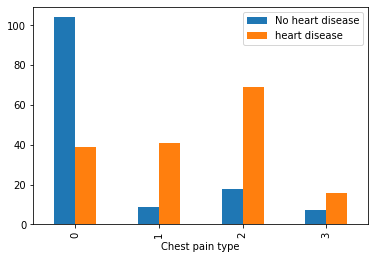

In [14]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot.bar()
plt.xlabel('Chest pain type')
plt.legend(['No heart disease','heart disease'])

isn't it weird that there is 69 out of 87 patients with type 2 which is not related to the heart have heart disease

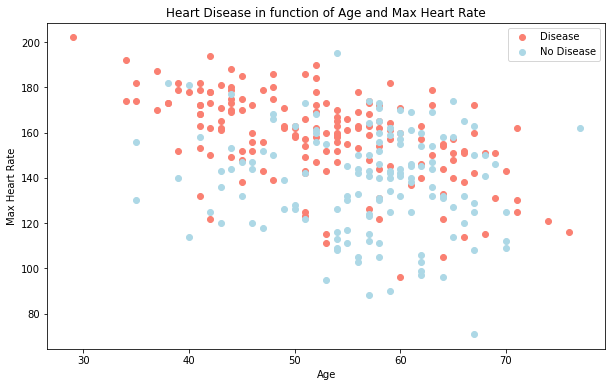

In [15]:
# Scatter with positive examples
plt.figure(figsize=(10,6))

plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.thalach[heart_disease.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [16]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


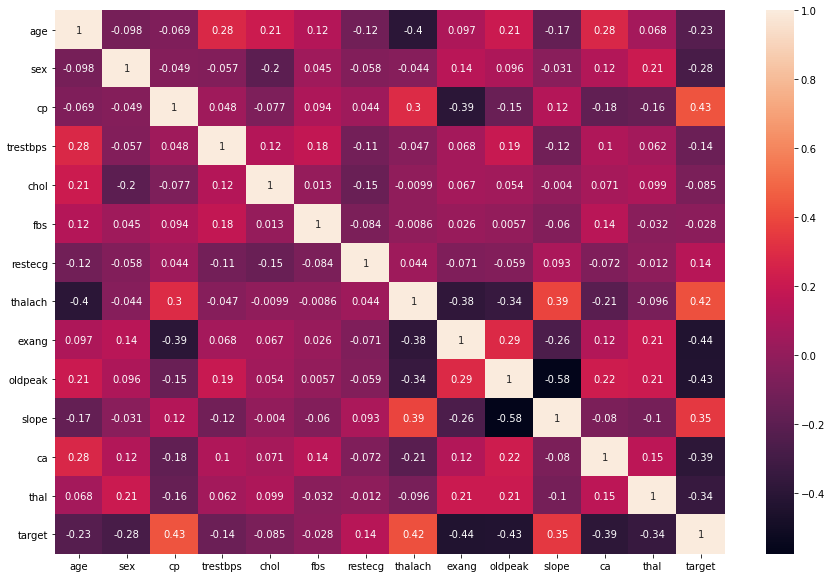

In [17]:
plt.subplots(figsize=(15,10))
sns.heatmap(heart_disease.corr(),annot=True);


### Prepare the data for machine learning

In [18]:
from sklearn.model_selection import train_test_split
np.random.seed(40)
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

we're gonna use 3 models for classification which are


1: KNeighborsClassifier

2: LogisticRegression

3:RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [20]:
def model_accuracy(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier()}
    np.random.seed(40)
    accuracies = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = model.score(X_test, y_test)
        accuracies[model_name] = accuracy
        
    return accuracies

In [21]:
accuracies = model_accuracy(X_train, y_train, X_test, y_test)
print(accuracies)

{'Logistic Regression': 0.9016393442622951, 'K-Nearest Neighbors': 0.7049180327868853, 'Random Forest': 0.8360655737704918}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


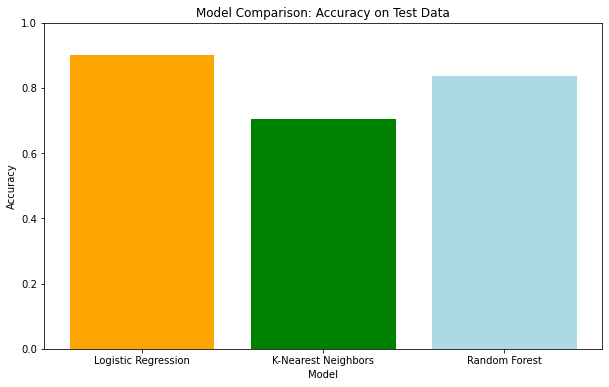

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['orange', 'green', 'lightblue'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy on Test Data')  
plt.ylim(0,1) # Sets the y-axis limit from 0 to 1 (since accuracy ranges from 0 to 1)
plt.show()

Even though our knn model is the lowest accuracy, let's try to tune it's hyperparameters and see how things would go


In [23]:
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [24]:
train_scores

[1.0,
 0.7975206611570248,
 0.7892561983471075,
 0.7768595041322314,
 0.768595041322314,
 0.7603305785123967,
 0.7396694214876033,
 0.7148760330578512,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752,
 0.6900826446280992,
 0.7148760330578512,
 0.7148760330578512,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925]

In [25]:
test_scores

[0.6229508196721312,
 0.5901639344262295,
 0.7049180327868853,
 0.5737704918032787,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344]

Maximum KNN score on the test data: 70.49%


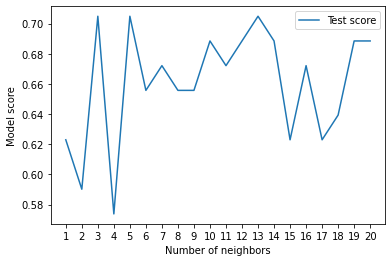

In [26]:

plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

even after tunning the model still gives the same accuracy and it's still less than the other models without any tunning to them 
so we will drop it.

In [27]:
## let's tune our two other models
## after doing some research I found that the liblinear solver is better with smaller datasets and we have 303 rows here

lr_grid= {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver":['liblinear']}

rf_grid={'n_estimators': np.arange(10,1000,50),
         'max_depth':[None,5,10,20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf':[5,10,20],
         'max_features': ['auto', 'sqrt', 'log2']}

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
np.random.seed(42)
lr_rs=RandomizedSearchCV(LogisticRegression(),param_distributions=lr_grid,n_iter=7,verbose=True,cv=5)

In [30]:
lr_rs.fit(X_train,y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=7,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
lr_rs.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [32]:
lr_rs.score(X_test,y_test)

0.9016393442622951

In [33]:
np.random.seed(40)
rf_rs=RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid ,n_iter=19 ,verbose=True, cv=5)

In [34]:
rf_rs.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklea

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=19,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rf_rs.best_params_

{'n_estimators': 360,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': None}

In [36]:
rf_rs.score(X_test,y_test)

0.8524590163934426

In [37]:
accuracies

{'Logistic Regression': 0.9016393442622951,
 'K-Nearest Neighbors': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

our model got about 1.7% higher but still our logistic regression model out performs it with it's original accuracy, so we will also drop it

let's try to improve our LogisticRegression model with GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
lr_gr = GridSearchCV(LogisticRegression(),param_grid=lr_grid,cv=5,verbose=True,scoring="accuracy")

In [40]:
lr_gr.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=True)

In [41]:
lr_gr.score(X_test,y_test)

0.9016393442622951

In [43]:
y_preds= lr_gr.predict(X_test)

the model performed very well with an accuracy of more than 90% with it's default hyperparameters without any tunning 

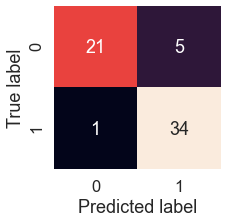

In [45]:
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig = plt.subplots(figsize=(3, 3))
    sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [50]:
from sklearn.metrics import RocCurveDisplay

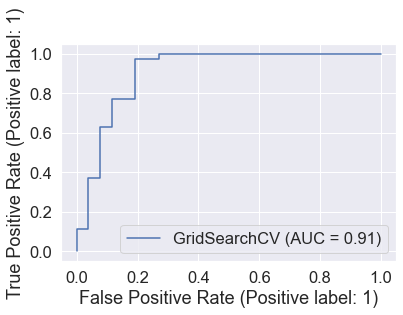

In [54]:
roc_display = RocCurveDisplay.from_estimator(lr_gr, X_test, y_test)
plt.show()


In [55]:
from sklearn.metrics import classification_report


In [56]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [57]:
from sklearn.model_selection import cross_val_score

In [60]:
lr_gr.best_params_

{'C': 0.1, 'solver': 'liblinear'}

In [61]:
clf=LogisticRegression(C= 0.1, solver ='liblinear')

In [63]:
cv_accuracy = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [68]:
cv_accuracy_mean = np.mean(cv_accuracy )
cv_accuracy_mean

0.834808743169399

In [64]:
cv_precision =cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.84848485, 0.85714286, 0.725     ])

In [70]:
cv_precision_mean = np.mean(cv_precision)

In [65]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [66]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964057

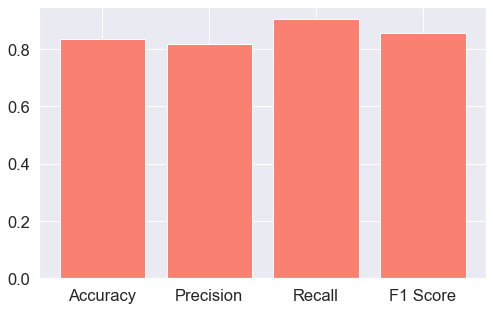

In [77]:
numbers = [cv_accuracy_mean, cv_precision_mean, cv_recall, cv_f1]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot the numbers with their names
plt.figure(figsize=(8, 5))
plt.bar(names, numbers, color='salmon')


plt.show()

## Feature Importance
which features affected most the outcomes of the model and how did they affect it.


In [78]:
clf=LogisticRegression(C= 0.1, solver ='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [81]:
clf.coef_

array([[ 0.00528131, -0.5773    ,  0.65751581, -0.02122326, -0.00159648,
        -0.064795  ,  0.26019854,  0.02885424, -0.32666742, -0.39535361,
         0.22280057, -0.53904199, -0.49342343]])

In [84]:
dict(zip(heart_disease.columns, clf.coef_[0]))

{'age': 0.005281307457162873,
 'sex': -0.5773000049207538,
 'cp': 0.6575158143116748,
 'trestbps': -0.021223256878192397,
 'chol': -0.0015964795553828702,
 'fbs': -0.06479499671854431,
 'restecg': 0.2601985422391584,
 'thalach': 0.028854243112679177,
 'exang': -0.32666741638247426,
 'oldpeak': -0.39535360559592647,
 'slope': 0.22280056643730947,
 'ca': -0.5390419863843434,
 'thal': -0.493423426578576}

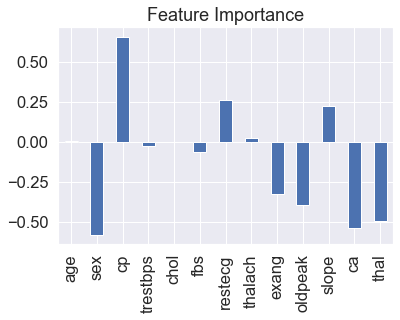

In [90]:
feature_df = pd.DataFrame(dict(zip(heart_disease.columns, clf.coef_[0])), index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
